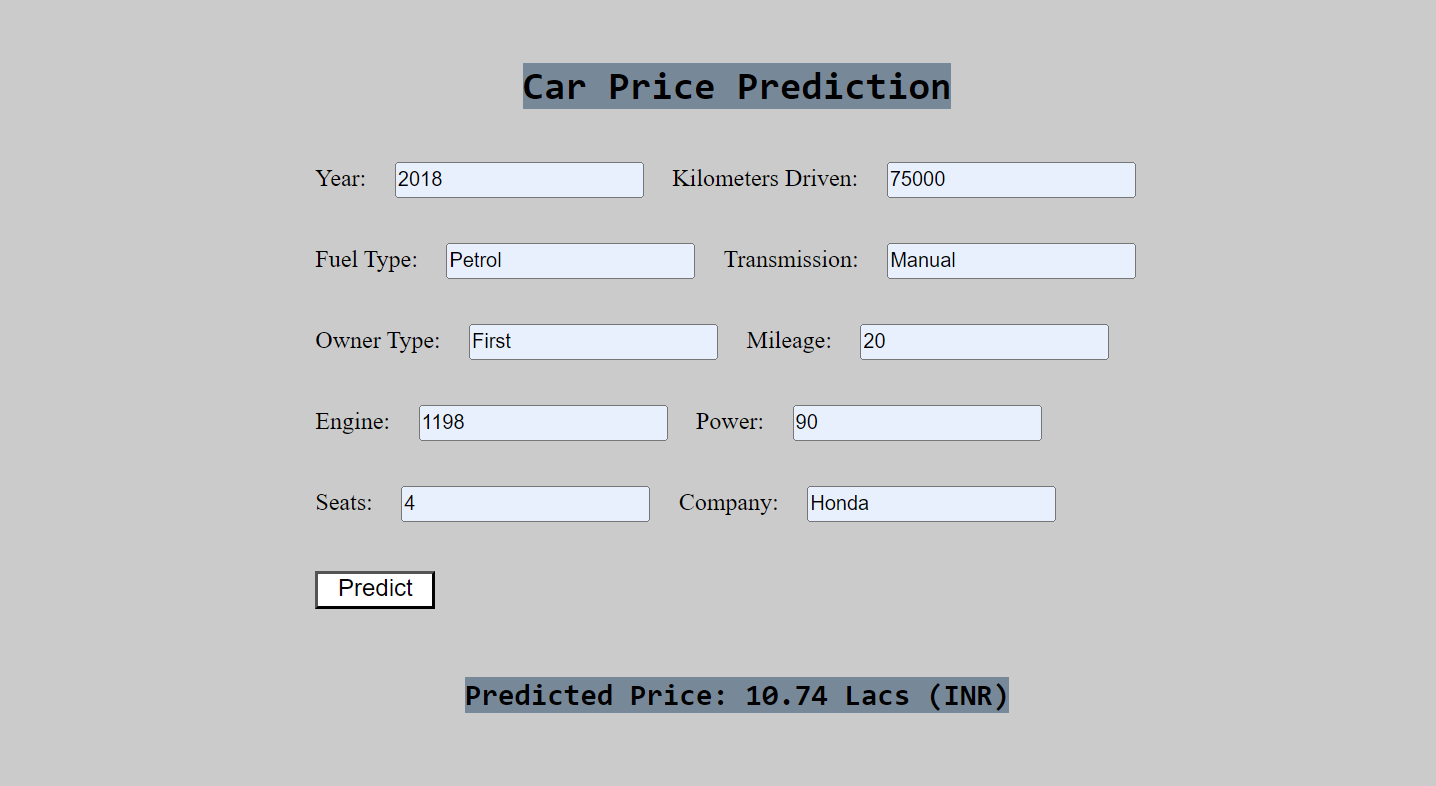

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

##1. Read Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EZI Projects/Car Price Predictor/dataset.csv")

In [ ]:
df.shape

(6019, 14)

In [ ]:
df.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75


## 2. Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Price']),
                                                 df['Price'],
                                                 test_size=0.3,
                                                random_state=42)

In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

##3. Exploratory Data Analysis

###i. Index
The first column is the index for each data point and hence we can simply remove it.

In [ ]:
X_train.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

###ii. Name
Let's explore the various cars in the dataset.

In [ ]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: Name, Length: 1592, dtype: int64

In [ ]:
# creating new column using name
X_train['company'] = X_train['Name'].str.split().str[0]
X_test['company'] = X_test['Name'].str.split().str[0]

In [ ]:
# drop name column
X_train.drop(columns=['Name'], axis=1, inplace=True)
X_test.drop(columns=['Name'], axis=1, inplace=True)

In [ ]:
# chk for null values
X_train['company'].isnull().sum()
X_test['company'].isnull().sum()

0

###iii. Location
Location should not be a determinant for the price of a car and I'll safely remove it.

In [ ]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

###iv. Year
Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [ ]:
# the car is how many years old from current year
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

###v. Kilometers_Driven
Kilometers_Driven is a numerical column with a certain range of values

In [ ]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

###vi. Mileage
This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [ ]:
X_train['Mileage'][0]

'26.6 km/kg'

In [ ]:
X_train['Mileage'] = X_train['Mileage'].str.split().str[0].astype(float)
X_test['Mileage'] = X_test['Mileage'].str.split().str[0].astype(float)

In [ ]:
# null values
X_train["Mileage"].fillna(X_train["Mileage"].astype("float").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float").mean(), inplace = True)

###vii. Engine, Power and Seats
The Engine values are defined in CC so I need to remove CC from the data. Similarly, Power has bhp, so I'll remove bhp from it. Also, as there are missing values in Engine, Power and Seats, I'll again replace them with the mean.

In [ ]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [ ]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

###viii. New Price
As most of the values are missing, I'll drop this column altogether.

In [ ]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

In [ ]:
X_train.to_csv('CarPricePredictor_train.csv', index=False)
X_test.to_csv('CarPricePredictor_test.csv', index=False)

In [ ]:
X_train.head(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,company
4201,13,77000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,Volkswagen
4383,8,19947,Petrol,Manual,First,20.36,1197.0,78.9,5.0,Hyundai
1779,10,70963,Diesel,Manual,First,15.10,2179.0,140.0,7.0,Mahindra


# Creating Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessing_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [2,3,4,9]),
        ('num_ss', StandardScaler(), [0,1,5,6,7,8])
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2, 3, 4, 9]),
                                                 ('num_ss', StandardScaler(),
                                                  [0, 1, 5, 6, 7, 8])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
r2_score(y_test, y_pred)

0.8823941131501383

In [ ]:
import joblib
# Save the pipeline as a pickle file
joblib.dump(pipeline, 'CarPricePredictor_pipeline.pkl')

['CarPricePredictor_pipeline.pkl']

In [ ]:
test_input = np.array([8, 19947, 'Petrol', 'Manual', 'First', 20.36, 1197.0, 78.9, 5.0, 'Hyundai'],dtype=object).reshape(1,10)

In [ ]:
pipeline.predict(test_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.6336])